In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
from desi_retriever.denali import get_specs
import matplotlib.cm as cm
import scipy.ndimage as sn

In [2]:
LRG = pd.read_csv('/Users/blue/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV_VI_cascades/Cascades/LRG/output/desi-vi_SV_cascades_combination_LRG_all_210521.csv')
LRG['DELTACHI2']=LRG['Redrock_deltachi2']

In [4]:
ELG = pd.read_csv('/Users/blue/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV_VI_cascades/Cascades/ELG/output/desi-vi_SV_cascades_combination_ELG_all_210521.csv')
ELG['DELTACHI2']=ELG['Redrock_deltachi2']

In [5]:
BGS = pd.read_csv('/Users/blue/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV_VI_cascades/Cascades/BGS/output/desi-vi_SV_cascades_combination_BGS_all_210521.csv')
BGS['DELTACHI2']=BGS['Redrock_deltachi2']

In [7]:
frames = [BGS, LRG, ELG]
ALL= pd.concat(frames)

In [9]:
denali_all = Table.read('/Volumes/Elements/DESI/Denali/denali_alltiles_Allzinfo.fits')
denali_all = denali_all[denali_all['coadd_type']=='cumulative']
new_catalog_denali = denali_all['TARGETID','Z','subset','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC','LAST_NIGHT',
                              'EFFTIME_BRIGHT','FIBERFLUX_R','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER'].to_pandas()

In [10]:
catalog_all_match = ALL.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_all_match[catalog_all_match['TILEID_cascades']==catalog_all_match['TILEID_denali']]

In [12]:
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])

<ipython-input-12-d90767f6f3de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])


In [13]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]


In [18]:
id = np.arange(0,5000)
number_of_problem = np.arange(0,5000)*0.0

In [22]:
for i in id:
    search = np.where(cut_catalog['FIBER']==i)[0]
    number_of_problem[i]=len(search)

In [23]:
number_of_problem

array([0., 0., 1., ..., 0., 0., 0.])

Text(0.5, 0, 'FIBERID')

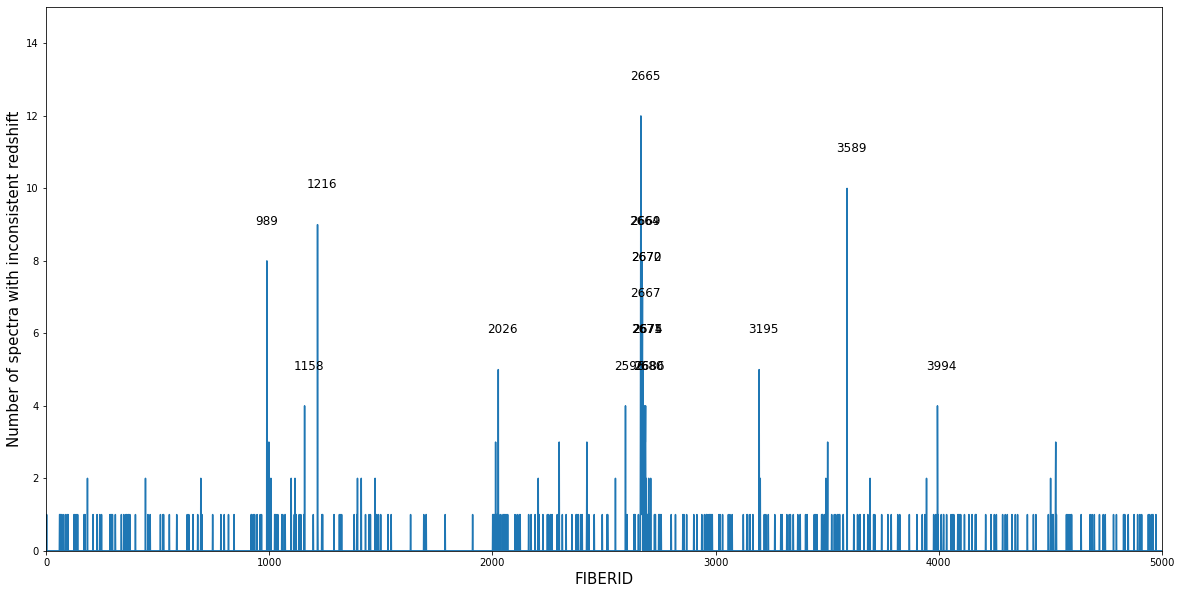

In [45]:
plt.figure(figsize=(20,10))
plt.plot(id,number_of_problem)
plt.ylim(0,15)
plt.xlim(-1,5000)
search = np.where(number_of_problem>=4)
for i in range(0,len(search[0])):
    plt.text(search[0][i]-50,number_of_problem[search[0][i]]+1,'%0.0f' % search[0][i],fontsize=12)
plt.ylabel('Number of spectra with inconsistent redshift',fontsize=15)
plt.xlabel('FIBERID',fontsize=15)